In [61]:
from signed_permutations import * 

# INPUT: N
# OUTPUT: B_n CHAR TABLE
def nth_chartable(n) : 
    W = signed_permutations(n)
    return matrix(W.character_table())

# HOW MANY CHAR TABLES DO U WANT TO LOOK AT?
num_char_tables = 9
char_table_list = []
for n in range(1, num_char_tables + 1) : 
    char_table_list.append(nth_chartable(n))


In [64]:

def col_equivs_graph(n,m):
    # given an n and m, returns the conjugacy classes which are congruent mod m
    before_mod = matrix(ZZ, char_table_list[n-1])
    G = Graph([ (x,y)
        # generates our list of G.connected_components() which are congruent columns
        for x in before_mod.columns()
        for y in before_mod.columns()
        if x!=y and vector(ZZ.quo(m),x) == vector(ZZ.quo(m),y)
    ])
    labels = []
    for i in G.connected_components():
        labels.append(list(map(
            lambda x: column_to_signed_partition(n,x), 
            #lambda defines a function object which takes x to the expression after the colon
            #this helps us use the map command on a function which requires two inputs
            i
        )
        )
        )
    print("I'm printing the columns in B_" + str(n) + " which are congruent mod " + str(m))
    for i in labels:
        print(i)
    return 0


mod = 3
for i in range (2,7):
    col_equivs_graph(i,mod)



def col_labels(n):
# INPUT: n of B_n
# OUTPUT: conjugacy classes (labels of columns)
    W = signed_permutations(n)
    col_reps = W.conjugacy_classes_representatives()
    col_labs = []
    for i in col_reps:
        col_labs.append(signed_cycle_type(n,i))
    return(col_labs)
                    

def column_to_signed_partition(n, col):
    #given a column of the character table A, returns the corresponding cycle type
    A = nth_chartable(n)
    index = A.columns().index(col)
    return tuple(col_labels(n)[index])




I'm printing the columns in B_2 which are congruent mod 3
I'm printing the columns in B_3 which are congruent mod 3
[([3], []), ([1, 1, 1], [])]
[([], [1, 1, 1]), ([], [3])]
I'm printing the columns in B_4 which are congruent mod 3
[([3, 1], []), ([1, 1, 1, 1], [])]
[([1, 1, 1], [1]), ([3], [1])]
[([1], [1, 1, 1]), ([1], [3])]
[([], [3, 1]), ([], [1, 1, 1, 1])]
I'm printing the columns in B_5 which are congruent mod 3
[([3, 1, 1], []), ([1, 1, 1, 1, 1], [])]
[([1, 1, 1, 1], [1]), ([3, 1], [1])]
[([3], [1, 1]), ([1, 1, 1], [1, 1])]
[([1, 1], [1, 1, 1]), ([1, 1], [3])]
[([1], [3, 1]), ([1], [1, 1, 1, 1])]
[([], [1, 1, 1, 1, 1]), ([], [3, 1, 1])]
[([2, 1, 1, 1], []), ([3, 2], [])]
[([3], [2]), ([1, 1, 1], [2])]
[([2], [3]), ([2], [1, 1, 1])]
[([], [2, 1, 1, 1]), ([], [3, 2])]
I'm printing the columns in B_6 which are congruent mod 3
[([3], [3]), ([1, 1, 1], [3]), ([3], [1, 1, 1]), ([1, 1, 1], [1, 1, 1])]
[([3, 3], []), ([3, 1, 1, 1], []), ([1, 1, 1, 1, 1, 1], [])]
[([], [3, 3]), ([], [3, 

In [13]:
# residue calculator returns the list of the numbers 
def residue_calculator(n, m) : 
  A = matrix(ZZ.quotient(m), char_table_list[n - 1]) 
  num_entries = len(A.columns())**2 
  residues_list = [0 for i in range(m)] 
  count = 0 
  for j in A : 
      for k in j : 
          residues_list[k] += 1
  for i in range(m) : 
    residues_list[i] = residues_list[i] / num_entries
  return residues_list 

proportions_list = []

# fills the residues list - each item of the list, from n = 1 to n = num_symm_groups
for n in range(num_char_tables) : 
  single_prop_list = []
  for m in [4,5,6,7,8,9] :
    single_prop_list.append(residue_calculator(n, m))
  proportions_list.append(single_prop_list)

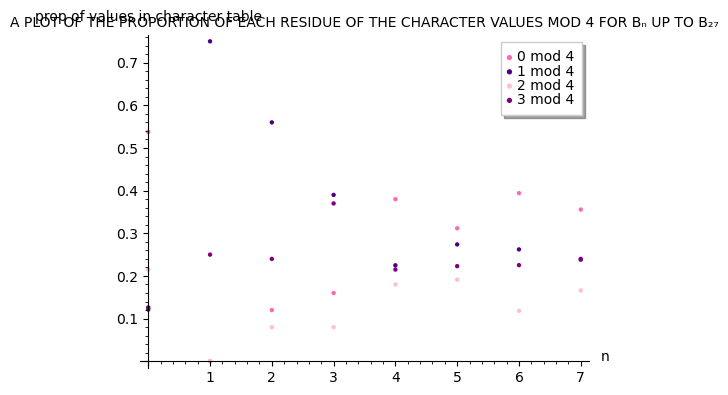

In [17]:
# Generate Mod 4 Plot

n = num_char_tables
m = 4

SUB = str.maketrans("0123456789n", "₀₁₂₃₄₅₆₇₈₉ₙ")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 
P0 = points([(i, proportions_list[i][m - 4][0]) for i in range(n)], color = 'hotpink', legend_label = '0 mod 4')
P1 = points([(i,  proportions_list[i][m - 4][1]) for i in range(n)], color = 'indigo', legend_label = '1 mod 4')
P2 = points([(i,  proportions_list[i][m - 4][2]) for i in range(n)], color = 'pink', legend_label = '2 mod 4')
P3 = points([(i,  proportions_list[i][m - 4][3]) for i in range(n)], color = 'purple', legend_label = '3 mod 4')
P = P0 + P1 + P2 + P3
P.show(axes_labels = ("n", "prop of values in character table"), axes_labels_size = 1, title= 'A PLOT OF THE PROPORTION OF EACH RESIDUE OF THE CHARACTER VALUES MOD 4 FOR ' + 'Bn'.translate(SUB) + ' UP TO ' + 'B7'.translate(SUB), title_pos = (0.5, 0.9), show_legend = true, legend_markerscale = 1.2)

